<a href="https://colab.research.google.com/github/NithyaPKiran/Assignments/blob/main/Assignment_MLR_2_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [13]:
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [16]:
startup.corr()

<ipython-input-16-7b5aa6741724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [17]:
startup = startup.rename({'R&D Spend':'RandD','Marketing Spend':'Marketing'},axis = 1)
startup.head()

,RandD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


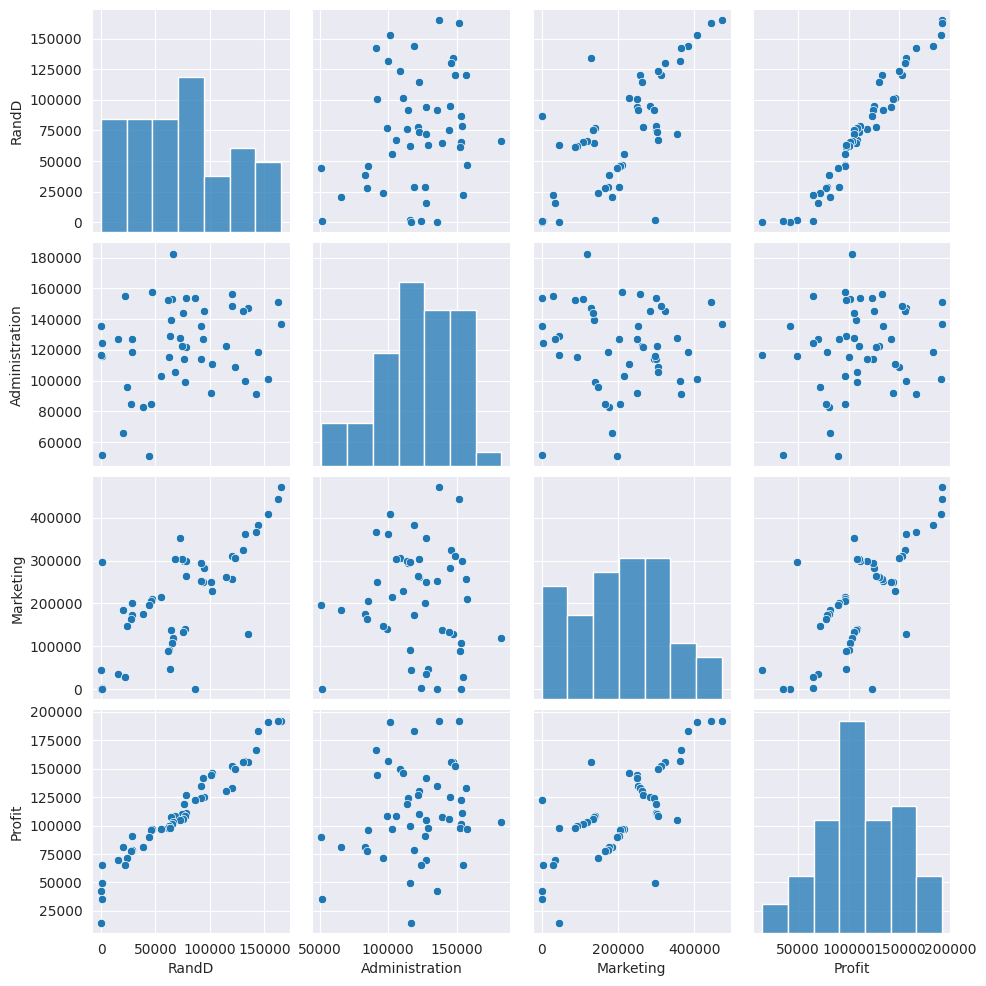

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [19]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RandD+Administration+Marketing+State',data=startup).fit()

In [20]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RandD                    0.806023
Administration          -0.027004
Marketing                0.026980
dtype: float64

In [21]:
(model.tvalues, '\n', model.pvalues)

(Intercept             7.280560
 State[T.Florida]      0.058970
 State[T.New York]    -0.012864
 RandD                17.368580
 Administration       -0.517012
 Marketing             1.573889
 dtype: float64,
 '\n',
 Intercept            4.444178e-09
 State[T.Florida]     9.532429e-01
 State[T.New York]    9.897941e-01
 RandD                2.578772e-21
 Administration       6.077373e-01
 Marketing            1.226769e-01
 dtype: float64)

In [22]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [24]:
ml_v=smf.ols('Profit~RandD',data = startup).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    19.320288
RandD        29.151139
dtype: float64 
 Intercept    2.782697e-24
RandD        3.500322e-32
dtype: float64


In [25]:
ml_w=smf.ols('Profit~Marketing',data = startup).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [26]:
ml_wv=smf.ols('Profit~State+Marketing',data = startup).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept            6.527427
State[T.Florida]    -0.121660
State[T.New York]    0.443248
Marketing            7.525386
dtype: float64 
 Intercept            4.672320e-08
State[T.Florida]     9.036982e-01
State[T.New York]    6.596638e-01
Marketing            1.493547e-09
dtype: float64


In [27]:
ml_x=smf.ols('Profit~State',data = startup).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [29]:
rsq_Administration = smf.ols('Administration~Marketing+RandD+Profit',data=startup).fit().rsquared
vif_Administration = 1/(1-rsq_Administration) # 16.33

rsq_Marketing = smf.ols('Marketing~Administration+RandD+Profit',data=startup).fit().rsquared
vif_Marketing = 1/(1-rsq_Marketing) # 564.98

rsq_randd = smf.ols('RandD~Marketing+Profit+Administration',data=startup).fit().rsquared
vif_randd = 1/(1-rsq_randd) #  564.84

rsq_Profit = smf.ols('Profit~Marketing+RandD+Administration',data=startup).fit().rsquared
vif_Profit = 1/(1-rsq_Profit) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Administration','Marketing','RandD','Profit'],'VIF':[vif_Administration,vif_Marketing,vif_randd,vif_Profit]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Administration,1.182146
1,Marketing,2.465332
2,RandD,19.563001
3,Profit,20.302917


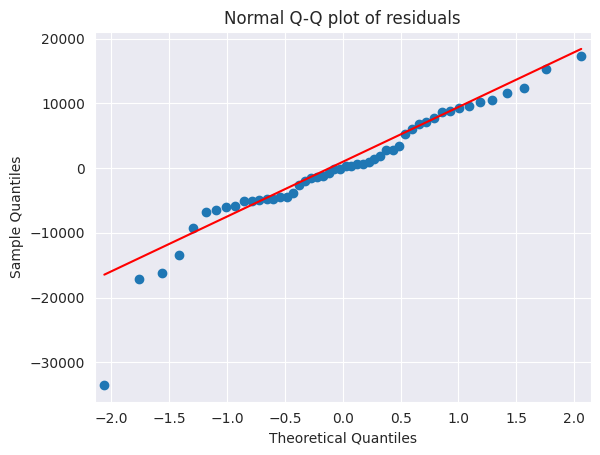

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid<10))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49])]

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

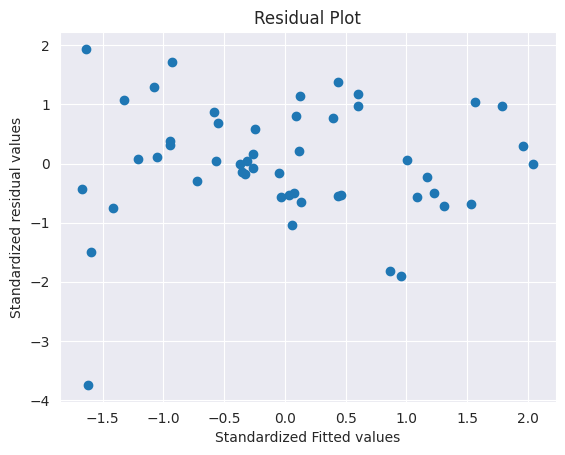

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

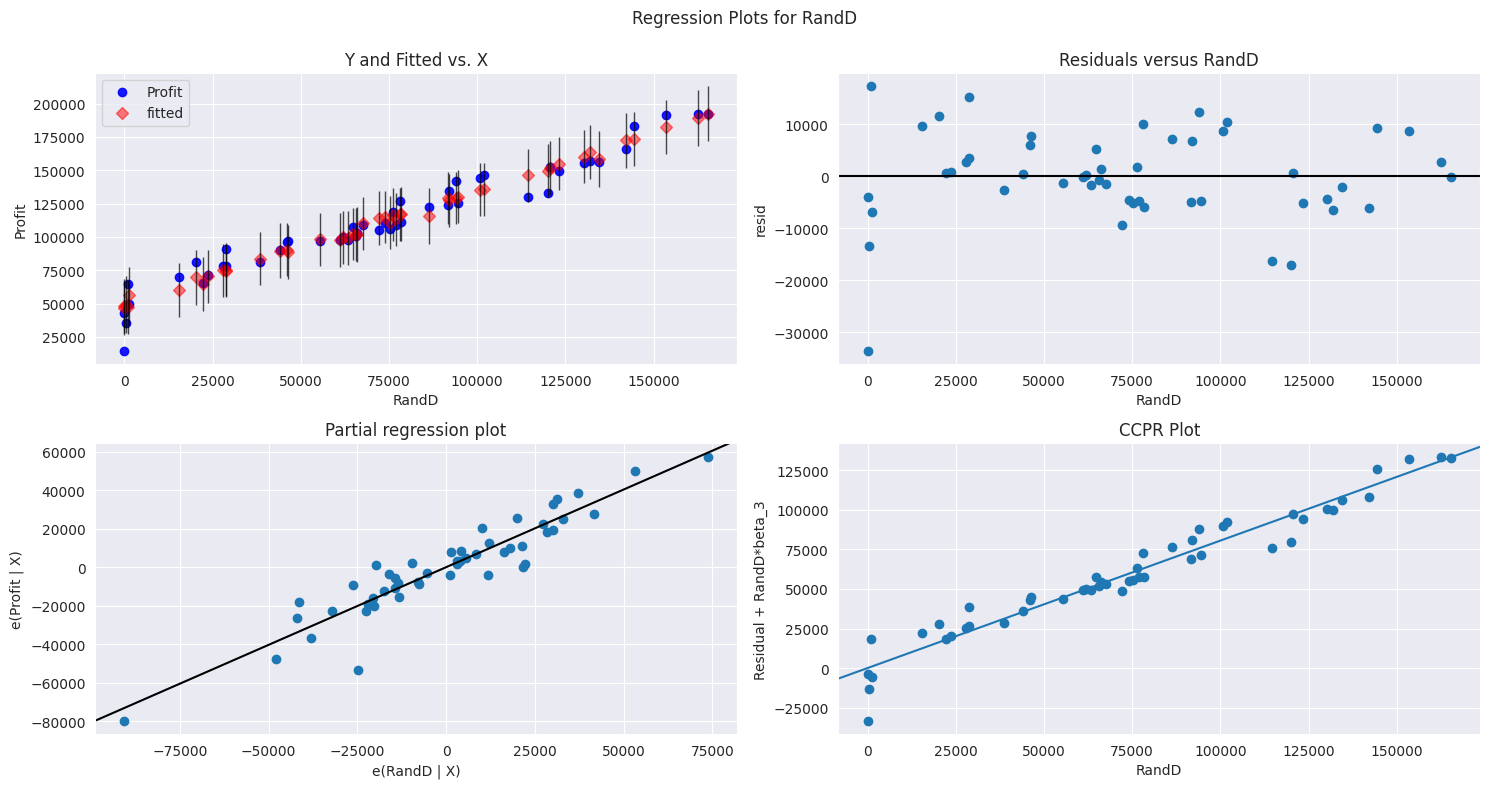

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandD", fig=fig)
plt.show()

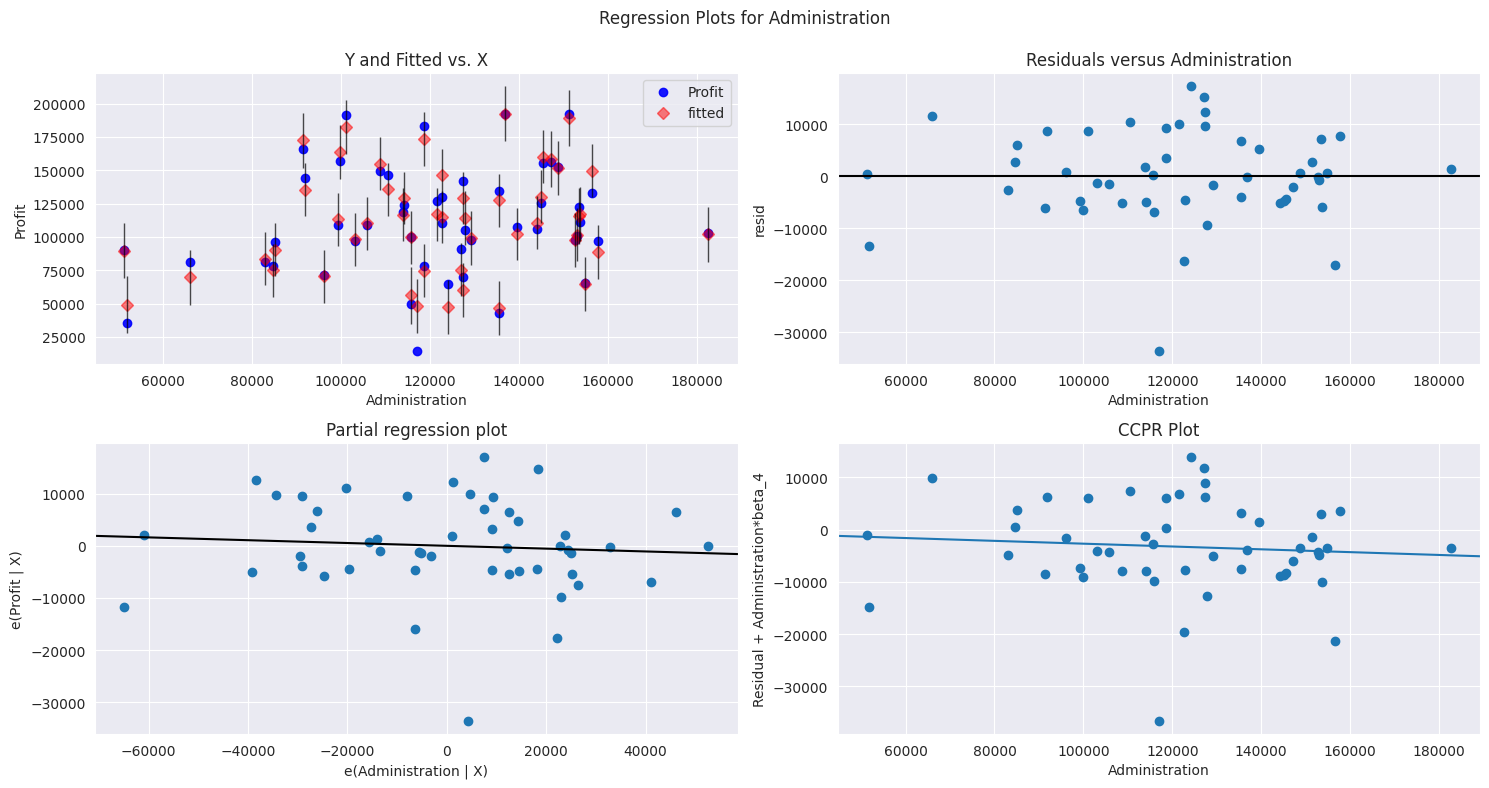

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

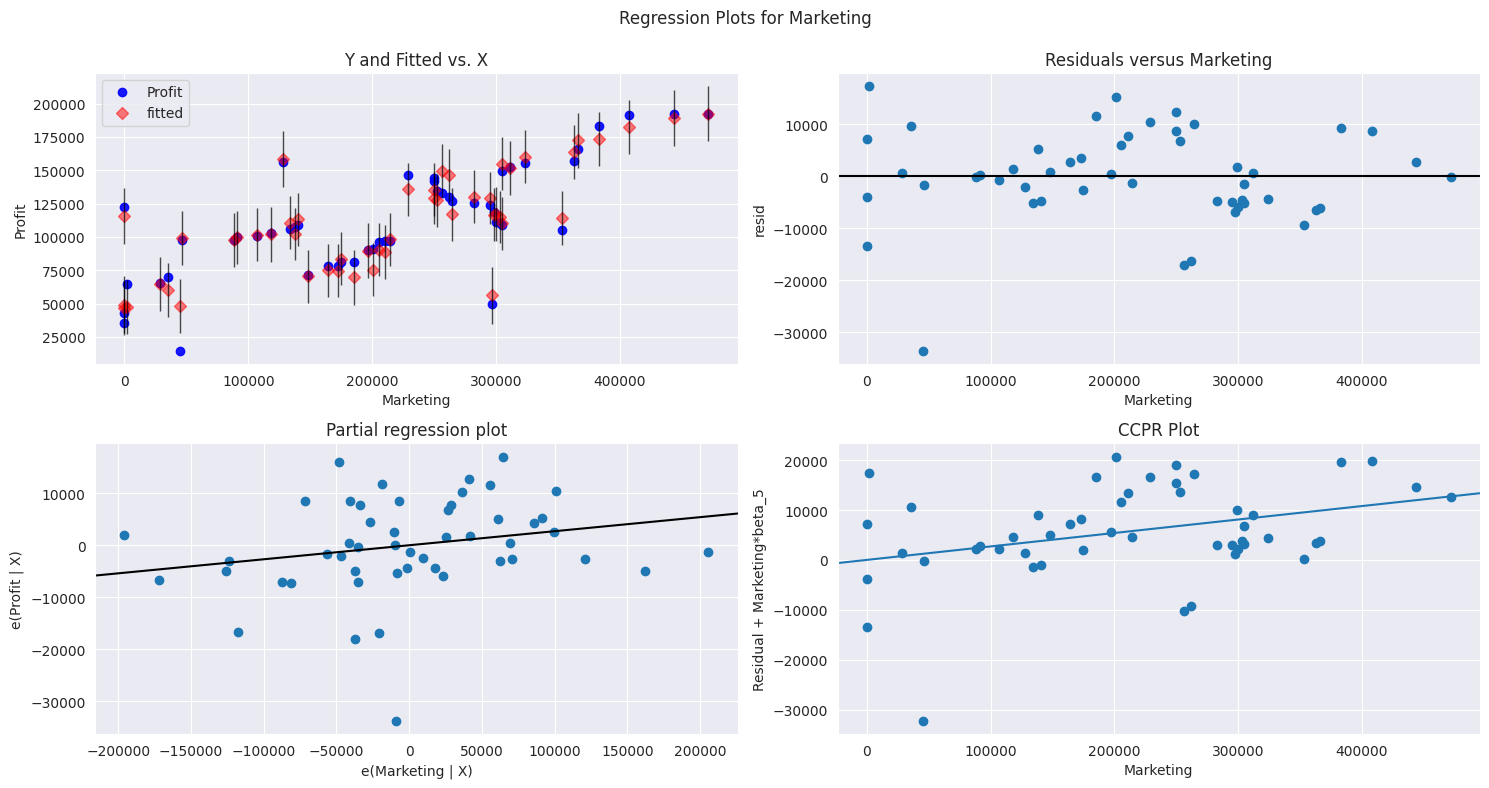

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

In [38]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

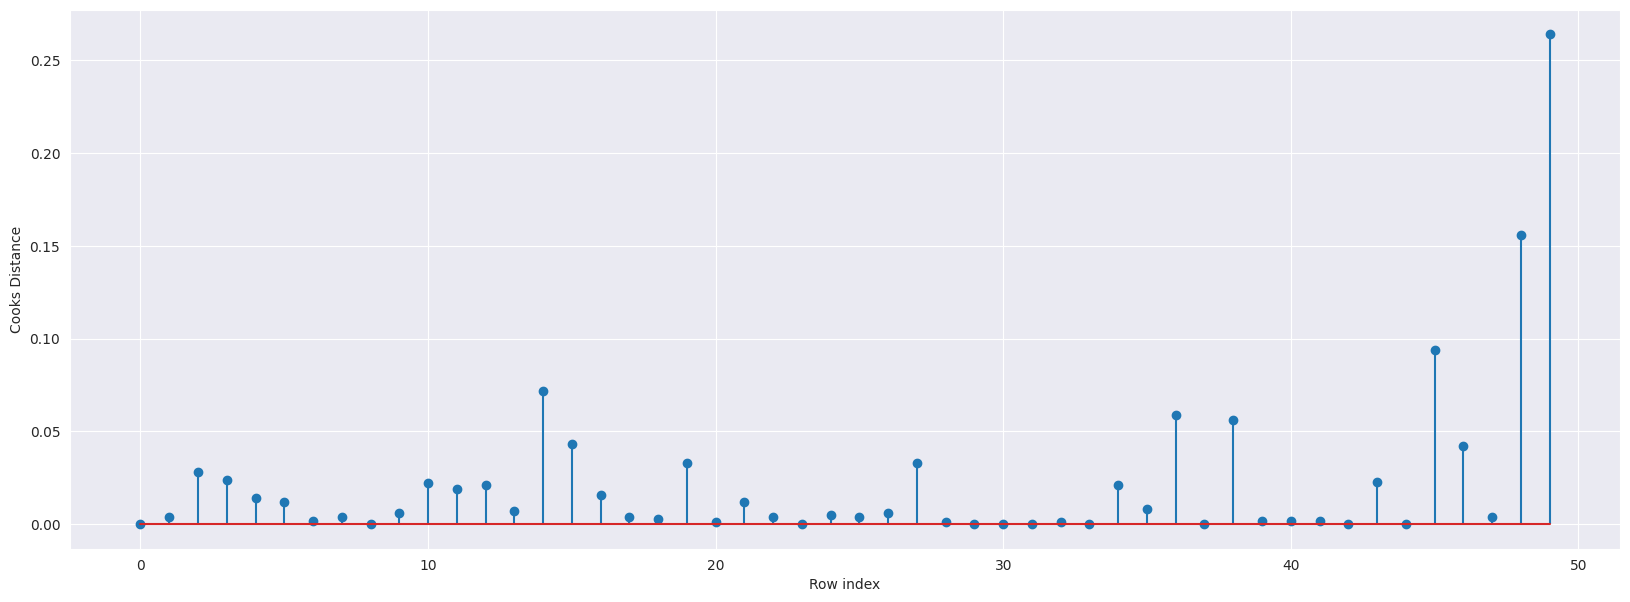

In [39]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
(np.argmax(c),np.max(c))

(49, 0.2639594358675491)

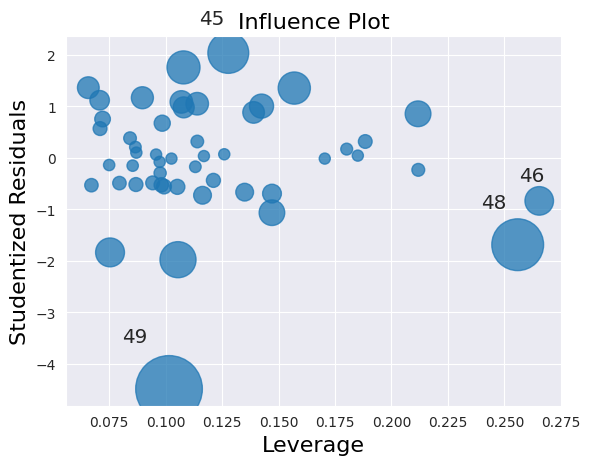

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [42]:
k = 4
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [43]:
startup[startup.index.isin([40, 49])]

,RandD,Administration,Marketing,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
49,0.00,116983.80,45173.06,California,14681.40


In [44]:
startup.head()

,RandD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
startup_new = startup

In [50]:
startup1=startup_new.drop(startup_new.index[[49]],axis=0).reset_index()

In [51]:
startup1=startup1.drop(['index'],axis=1)

In [52]:
startup1.head()

,RandD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [54]:
final_ml_V= smf.ols('Profit~RandD+Marketing+Administration',data = startup1).fit()

In [55]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.9613162435129847, 1020.5652974526367, 1028.1325786450793)

In [56]:
final_ml_W= smf.ols('Profit~Profit+RandD+Administration',data = startup1).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

In [57]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RandD+Administration+Marketing",data=startup1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup1=startup1.drop(startup1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup1
else:
    final_model=smf.ols("Profit~RandD+Administration+Marketing",data=startup1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [58]:
final_model.rsquared

0.9613162435129847

In [59]:
startup1.head()

,RandD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [60]:
new_data=pd.DataFrame({'RD_Spend':70000,"Administration":90000,"Marketing_Spend":140000},index=[0])
new_data

,RD_Spend,Administration,Marketing_Spend
0,70000,90000,140000


In [61]:
pred_y=final_model.predict(startup1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [62]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,Final_Model,0.961316
